## This notebook contains almost all the other notebooks

#### Preperation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization

import warnings            
warnings.filterwarnings("ignore") 

from pandas.plotting import parallel_coordinates

import os
#print(os.listdir(r"C:\Users\janik.sdt\Documents\Data_Sets\Is-the-world-happy\Datasets\Raw Data"))


#load data from csv file
data_2015=pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2015.csv")
data_2016=pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2016.csv")
data_2017=pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2017.csv")

data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]

data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]

data_2015.head(10)
data_2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [2]:

print("Are There Missing Data? :",data_2015.isnull().any().any())
print(data_2015.isnull().sum())

#we found out how many hospital country in our data
print("\n\nRegion in Dataset:\n")
print("There are {} different values\n".format(len(data_2015.Region.unique())))
print(data_2015.Region.unique())

region_lists=list(data_2015['Region'].unique())

region_happiness_ratio=[]

for each in region_lists:
    
    region=data_2015[data_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)

data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio}) 

new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data


Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


Region in Dataset:

There are 10 different values

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


#### Pairplot of the different correlation

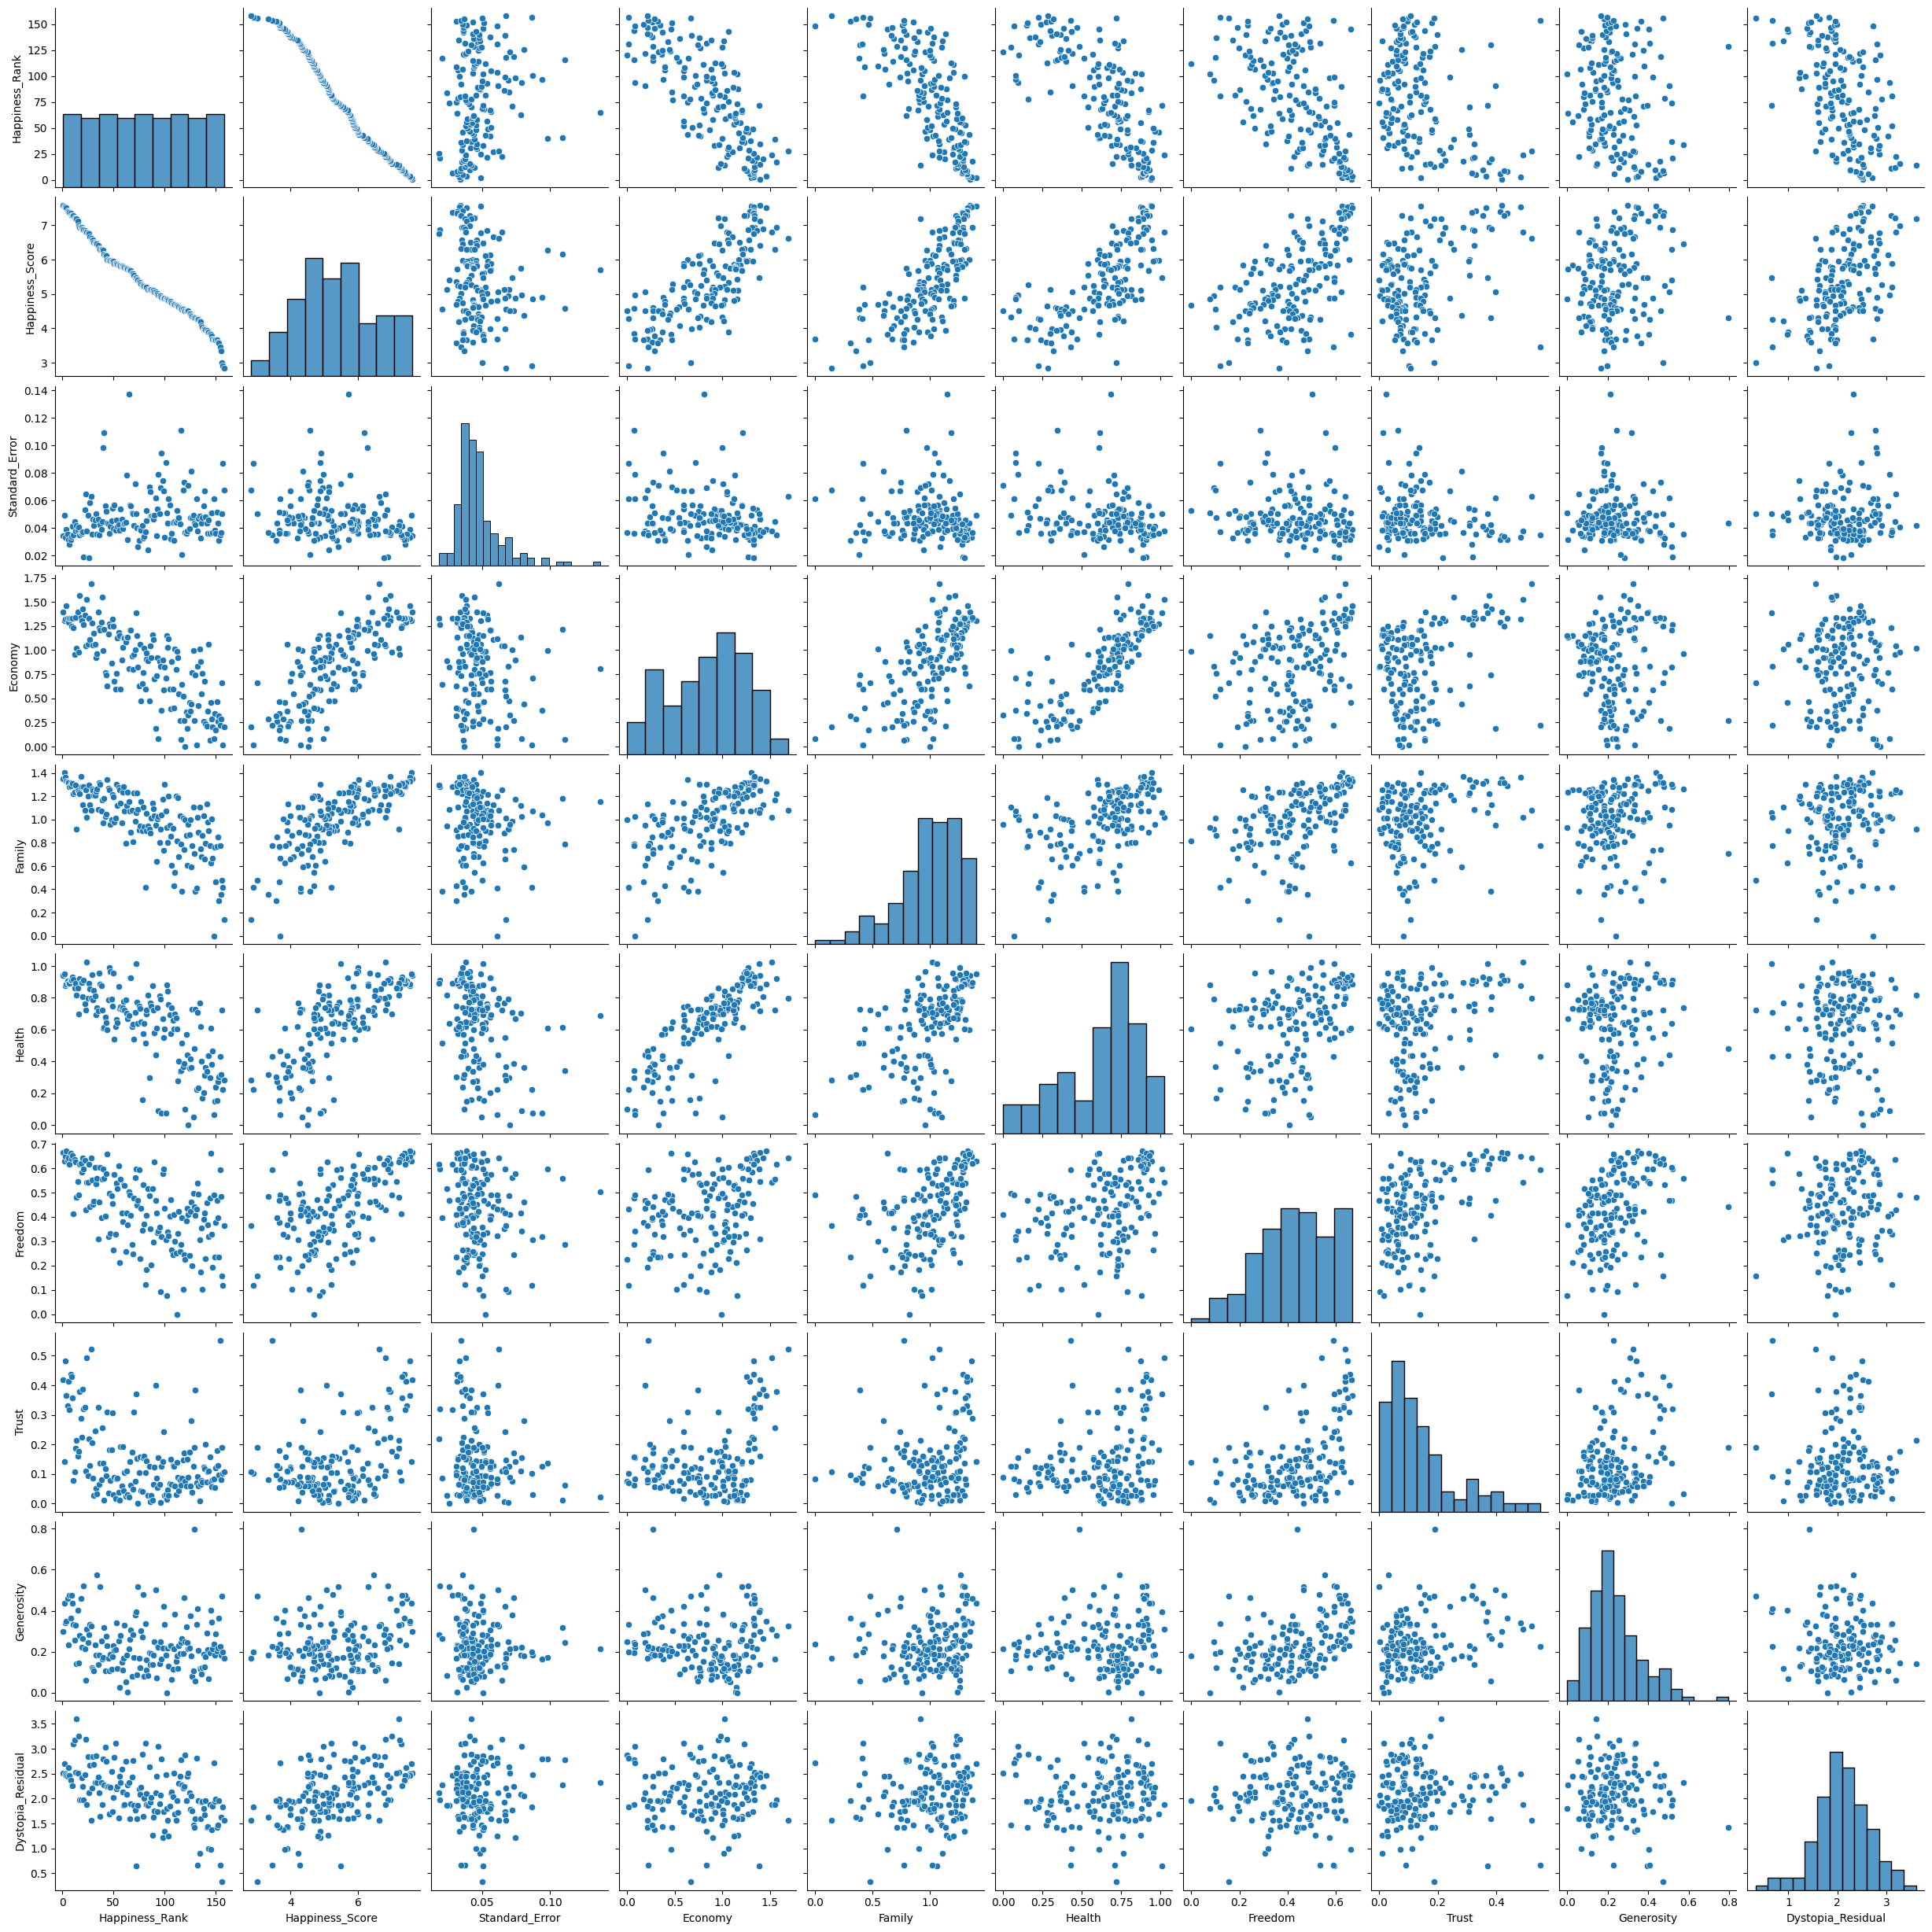

In [7]:

## Plot
data_2015.columns

sns.pairplot(data_2015)

df15=pd.read_csv('/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2015.csv')
df16=pd.read_csv('/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2016.csv')
df17=pd.read_csv('/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2017.csv')
df18=pd.read_csv('/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2018.csv')

df15['Year']='2018'
df15['Year']='2015'
df16['Year']='2016'
df17['Year']='2017'

df15.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data2=df15.filter(['Country','GDP per capita',"Year"],axis=1)

df16.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data3=df16.filter(['Country','GDP per capita',"Year"],axis=1)

df17.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita'},inplace=True)
data4=df17.filter(['Country','GDP per capita','Year'],axis=1)

df18.rename(columns={'Country or region':'Country'},inplace=True)
data5=df18.filter(['Country','GDP per capita',"Year"],axis=1)

data2=pd.concat([data3,data4,data5,data2])


#### Happiness per region

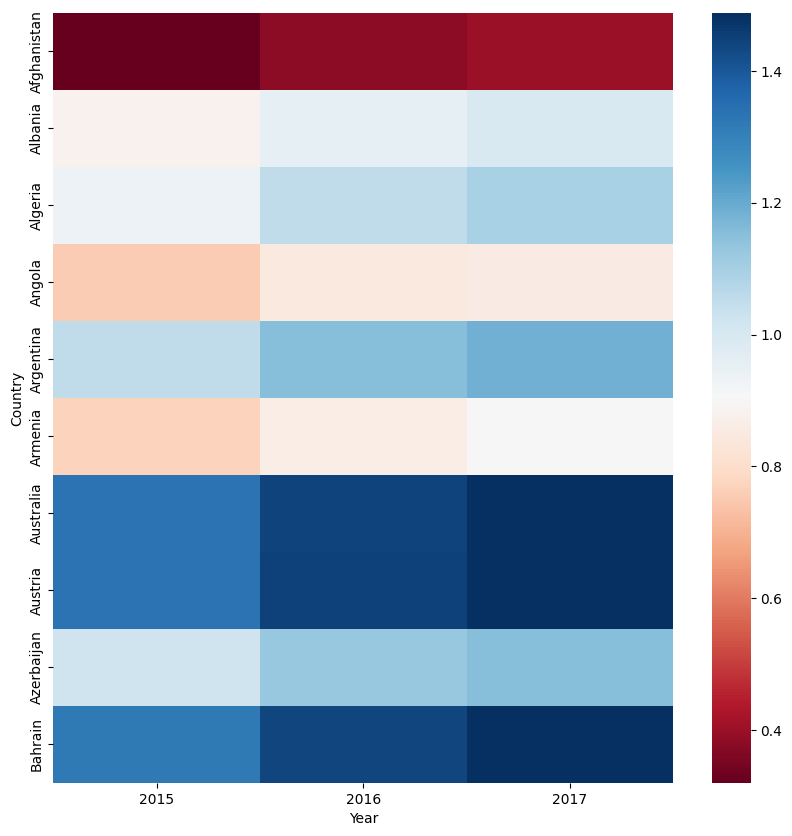

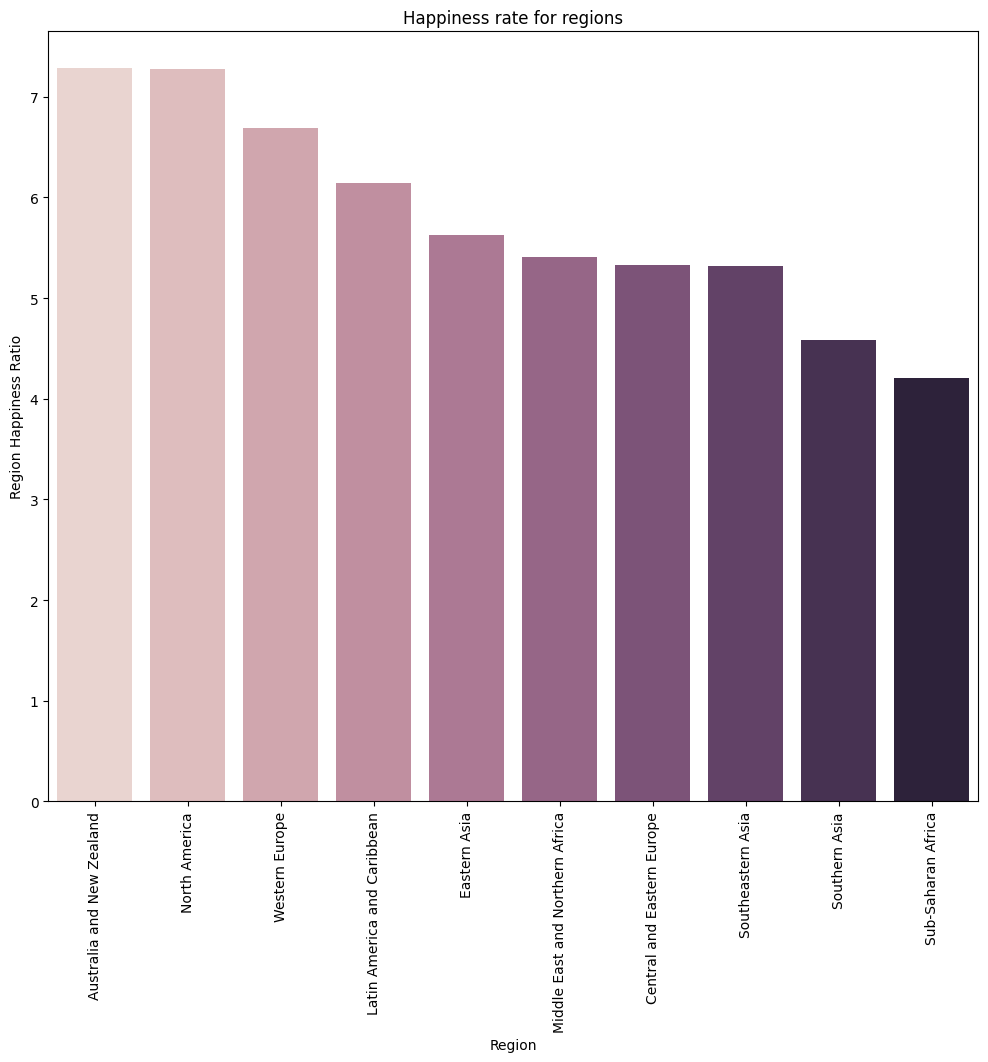

In [8]:

plt.figure(figsize=(10, 10))
h=pd.pivot_table(data2,values='GDP per capita',
index=['Country'],
columns='Year')
h=h.head(10)
sns.heatmap(h,cmap="RdBu")

plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))

#ix_palette(len(sorted_data['region']))

plt.xticks(rotation=90)

plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()


#### economy per region and the proportion of the different coloumns

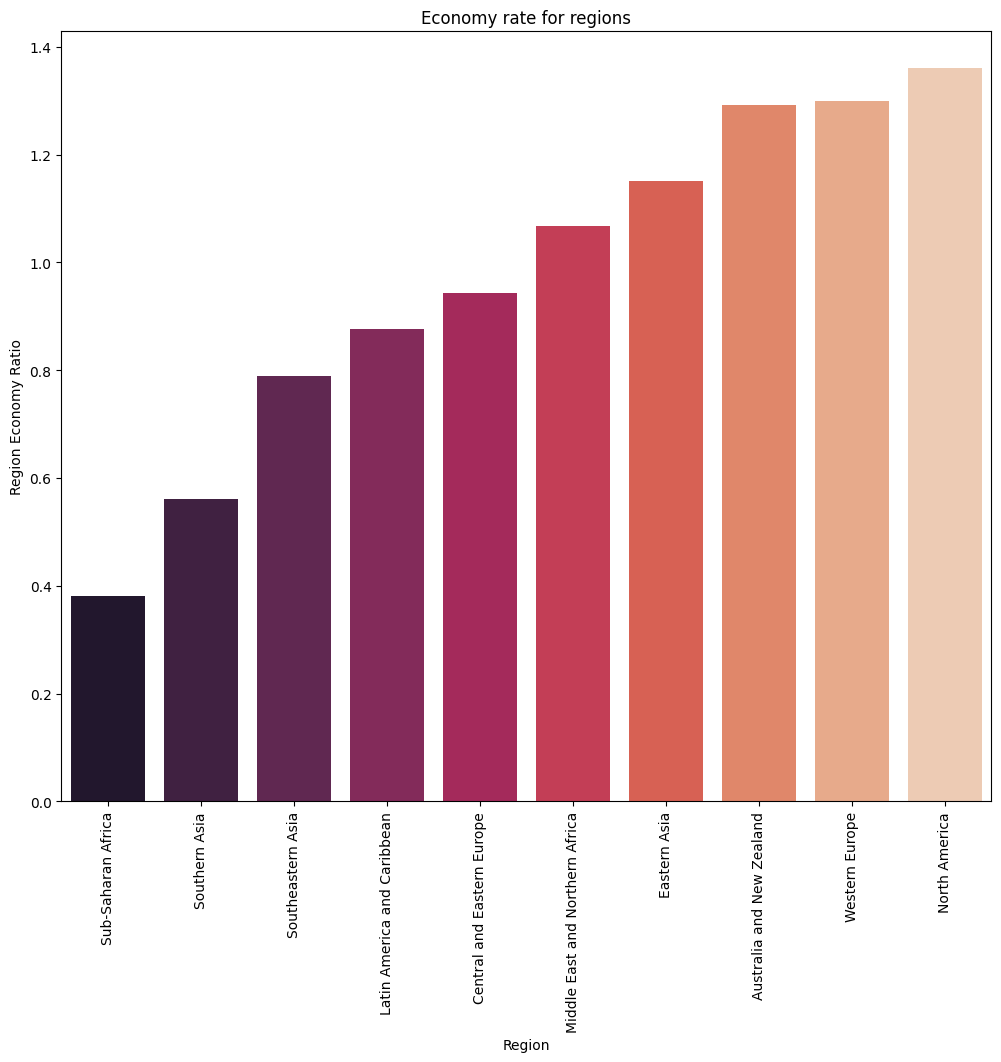

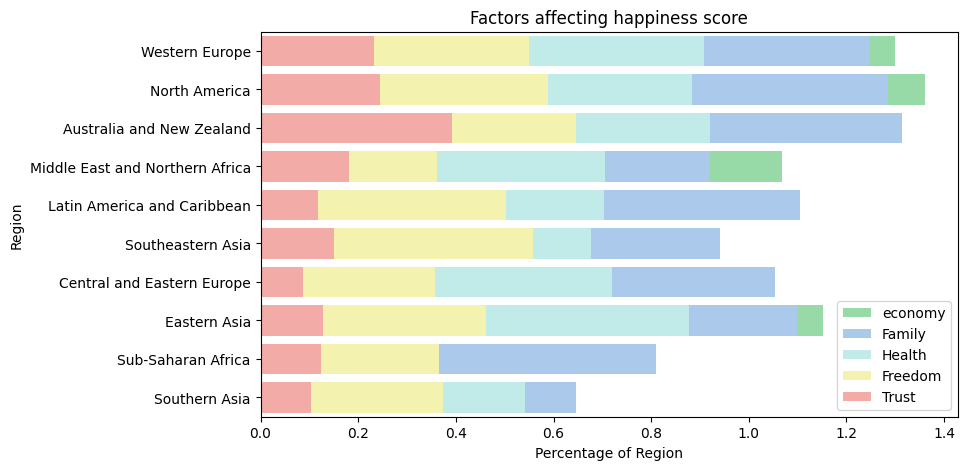

In [9]:

region_Lists=list(data_2015['Region'].unique())
region_economy_ratio=[]

for each in region_lists:
    
    region=data_2015[data_2015['Region']==each]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)
    
data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=True)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head() 

f,ax1=plt.subplots(figsize=(12,10))

sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'],palette="rocket", ax=ax1)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

#Horizontal bar plot
region_lists=list(data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]

for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))

f,ax=plt.subplots(figsize=(9,5))
sns.set_color_codes("pastel")

sns.barplot(x=share_economy,y=region_lists,color='g',label='economy')
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()


#### The happiness Score and Economy per region

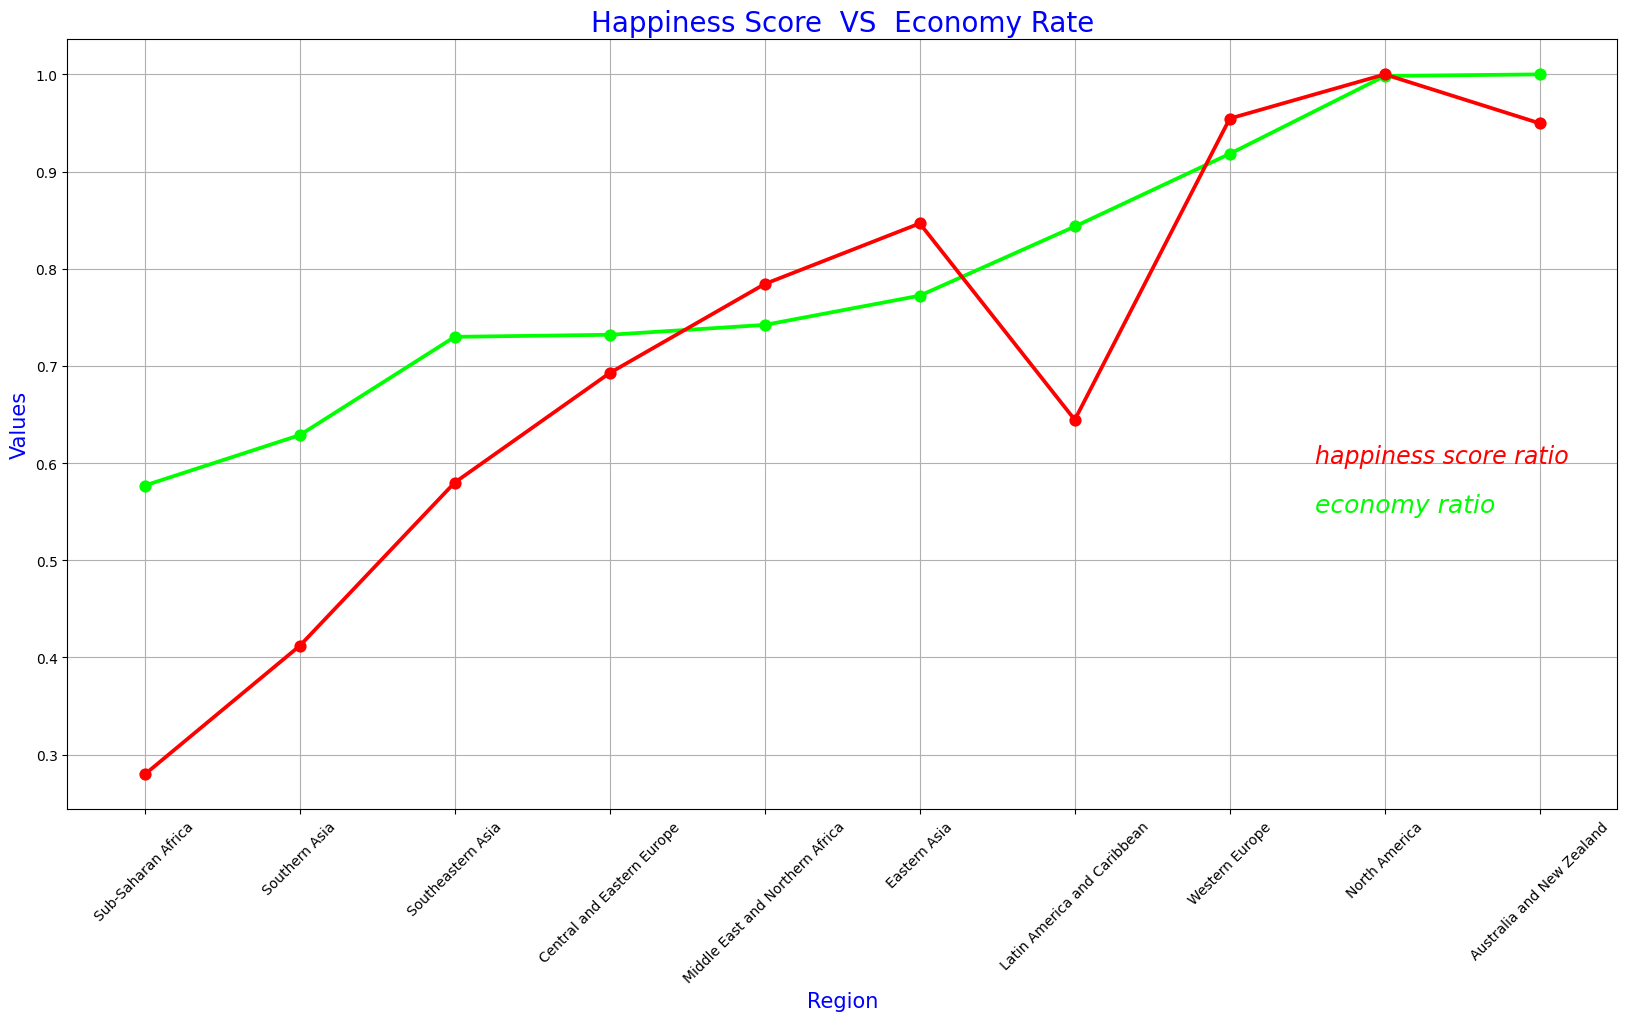

In [10]:

sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)

#Visualization
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime')
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red')
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style = 'italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Happiness Score  VS  Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()


In [11]:

#broadcasting
data_2015['Year']=2015
data_2016['Year']=2016
data_2017['Year']=2017
#concating
data_concat=pd.concat([data_2015,data_2016,data_2017],axis=0,sort = False)

df=pd.pivot_table(data_concat, index = 'Year', values="Happiness_Score")
df


,Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


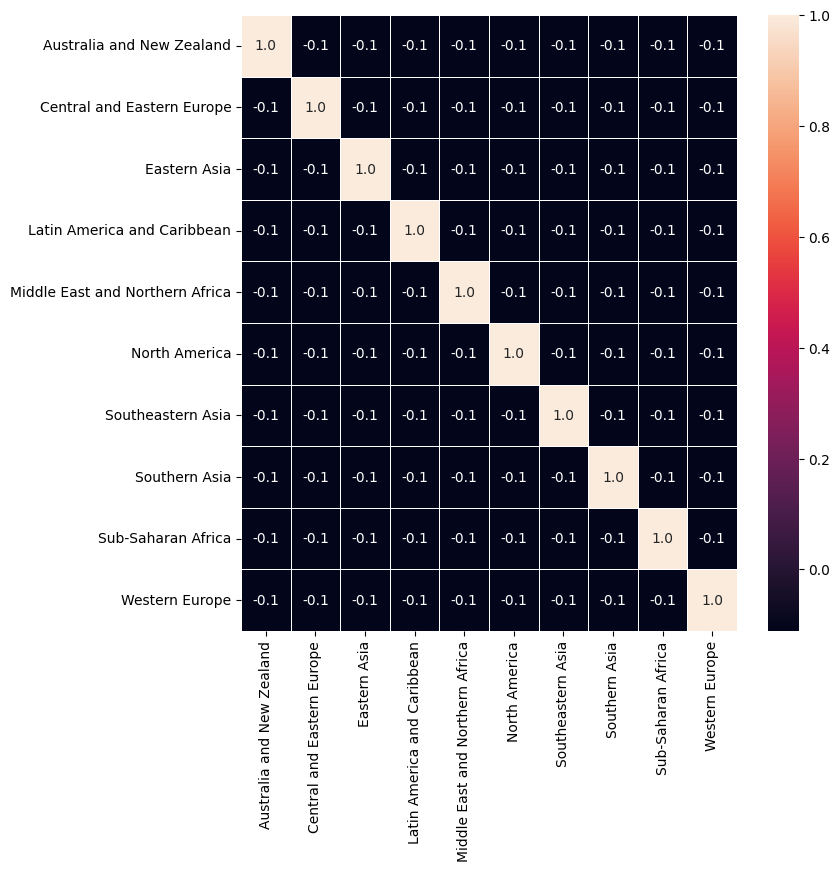

In [12]:

data_one_hot=pd.get_dummies(region_lists)

f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data_one_hot.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()


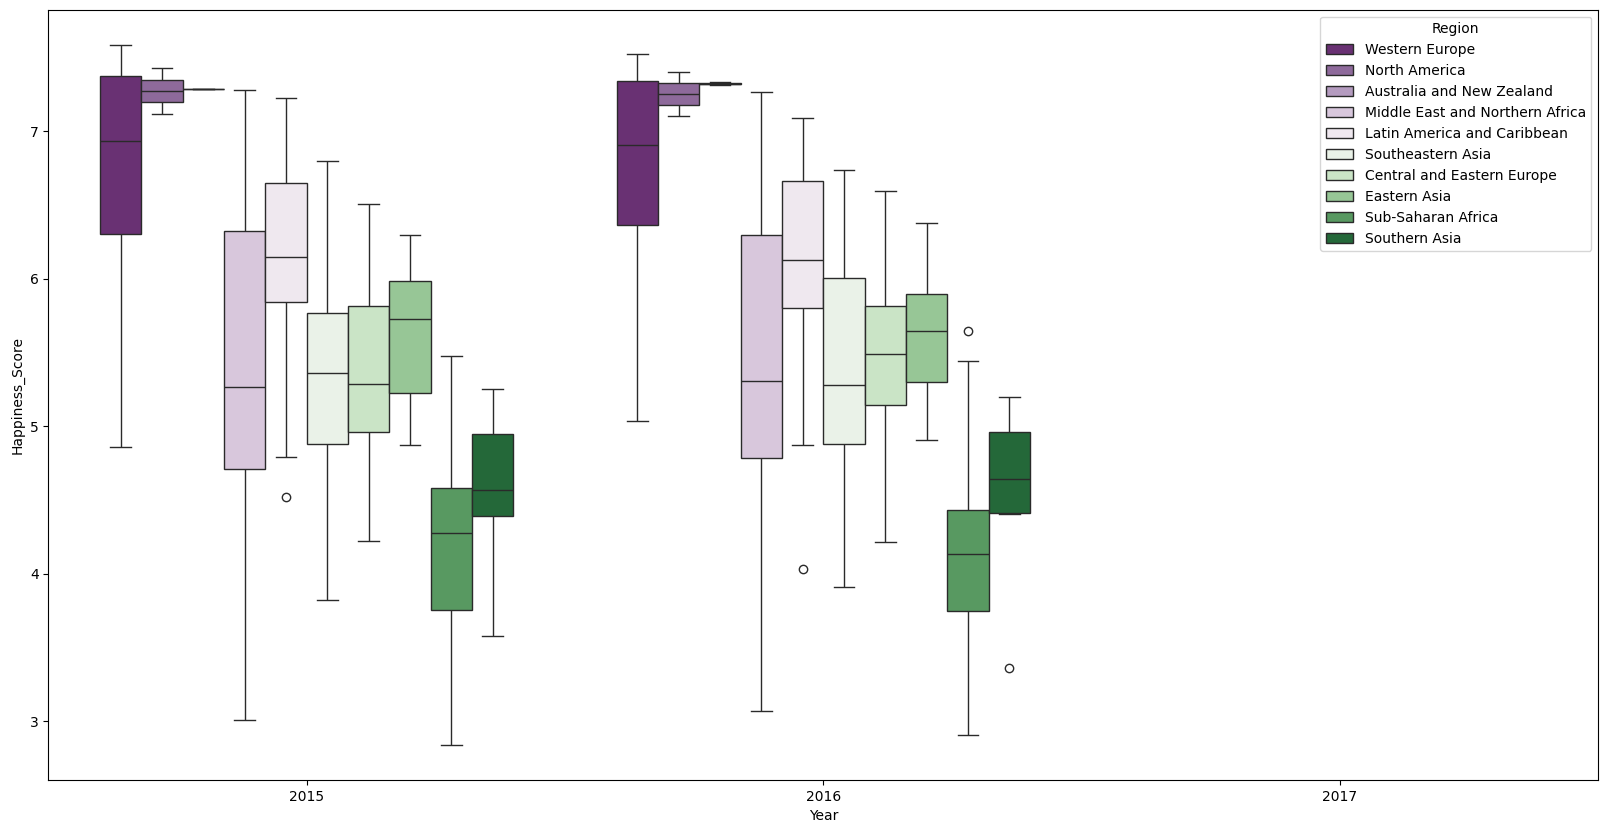

In [13]:

f,ax=plt.subplots(figsize=(20,10))

sns.boxplot(x="Year",y="Happiness_Score",hue="Region",data=data_concat,palette="PRGn",ax=ax)
plt.show()


#### Clustering the different regions

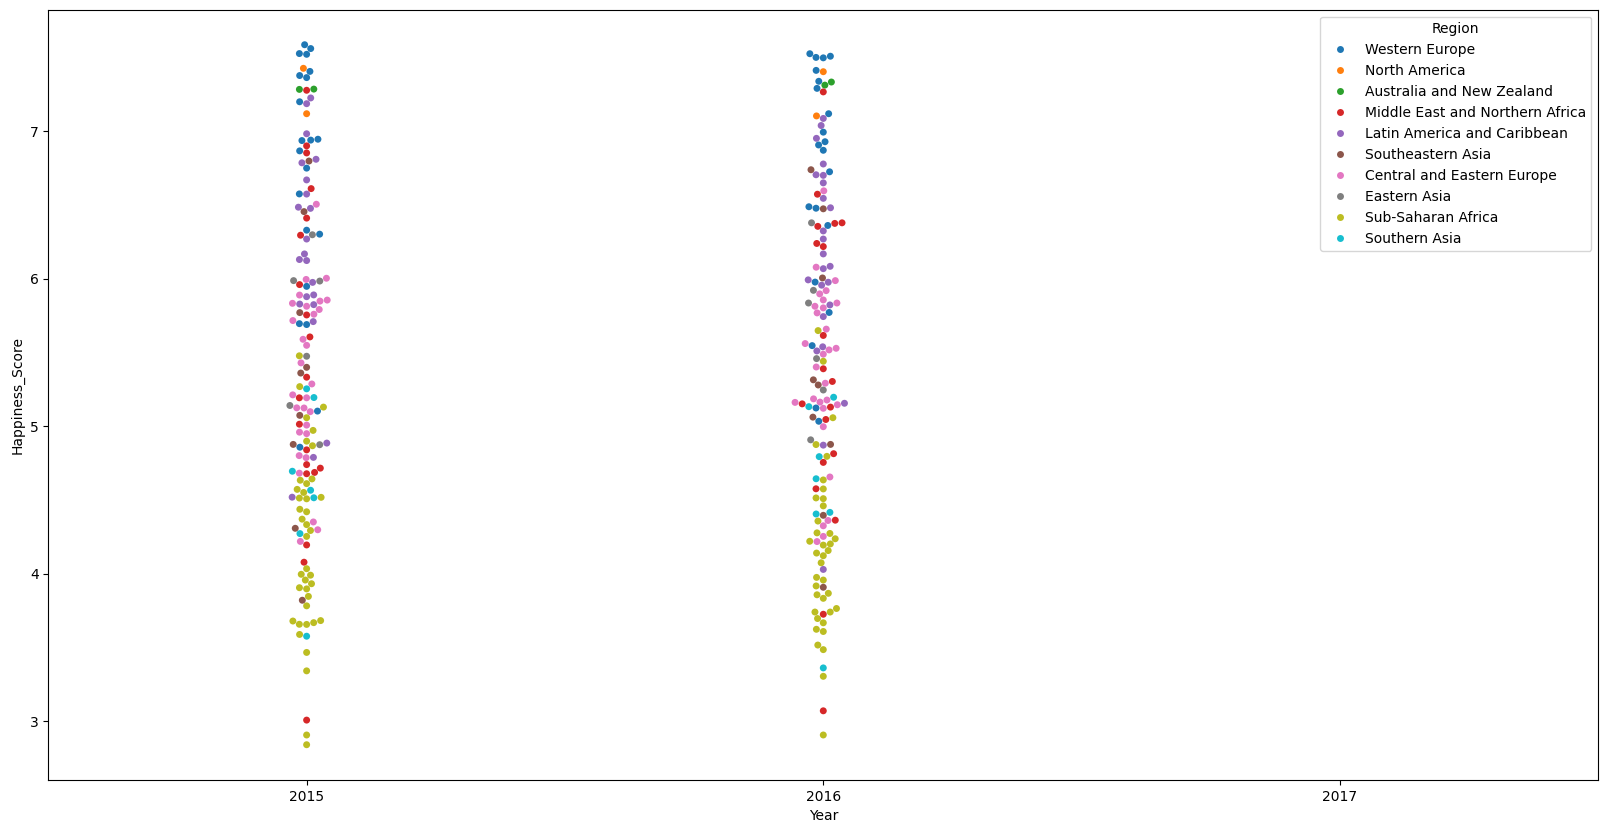

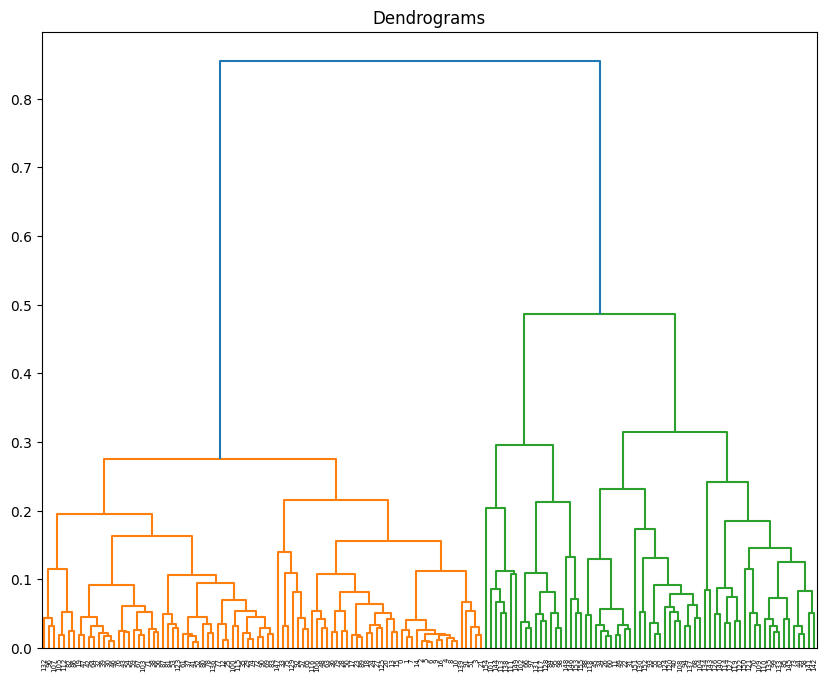

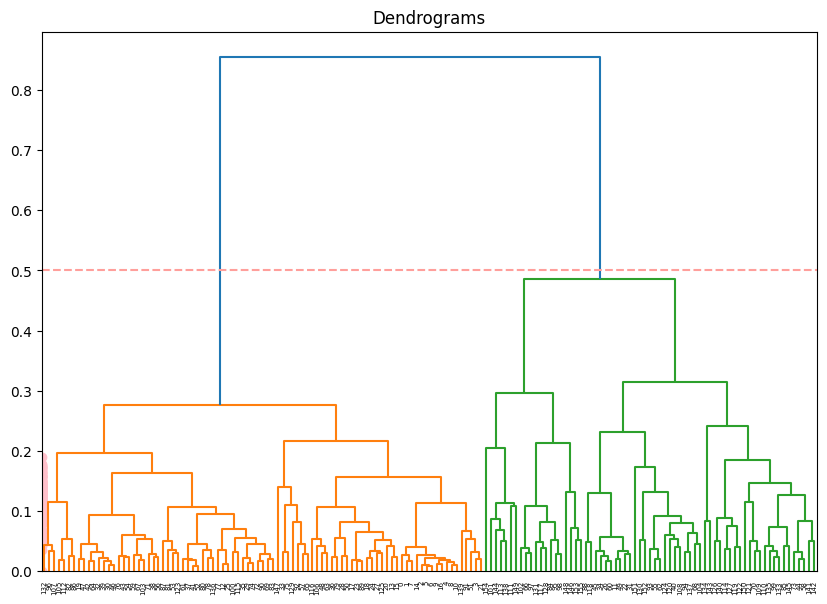

[[0.1455177  0.07640553]
 [0.2054251  0.13849264]
 [0.25122217 0.11686624]]


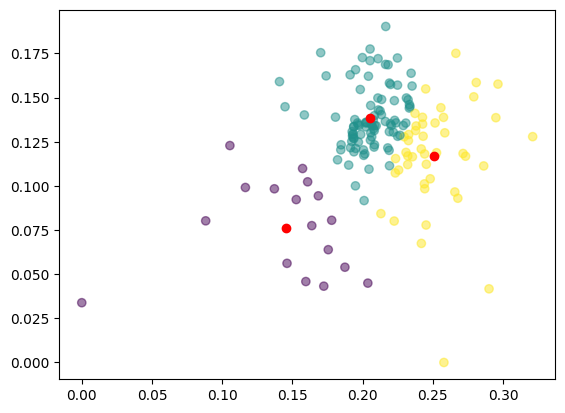

In [14]:

f,ax = plt.subplots(figsize =(20,10))
sns.swarmplot(x="Year" , y="Happiness_Score", hue="Region",data=data_concat,ax=ax)
plt.show()

##Clustering
df=pd.read_csv('/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2019.csv')
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
original=original.drop(['Country or region','Overall rank'],axis=1)

from sklearn.preprocessing import normalize
data_scaled = normalize(original)
data_scaled = pd.DataFrame(data_scaled, columns=original.columns)
datasc=data_scaled.copy()
data_scaled.head()

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')

X = datasc[["Social support","Healthy life expectancy"]]
plt.scatter(X["Social support"],X["Healthy life expectancy"],c='pink')
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Social support'], X['Healthy life expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()